# Linear Regression
Linear regression is one of the most basic forms of machine learning and is used to predict numeric values.
## How It Works
Linear regression follows a very simple concept. If data points are related linearly, we can generate a line of best fit for these points and use it to predict future values. Let's take an example of a data set with one feature and one label.

(0.0, 6.0, 0.0, 20.0)

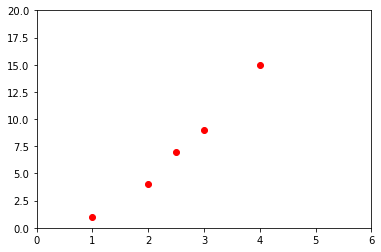

In [1]:
import matplotlib.pyplot as plt
import numpy as np

x = [1, 2, 2.5, 3, 4]
y = [1, 4, 7, 9, 15]
plt.plot(x, y, 'ro') #To plot y versus x as lines and/or markers, where 'ro' represents red circle markers
plt.axis([0, 6, 0, 20]) #To get or set some axis properties, where [xmin, xmax, ymin, ymax] tells the axis limits

We can see that this data has a linear coorespondence. When the x value increases, so does the y. Because of this relation we can create a line of best fit for this dataset. In this example our line will only use one input variable, as we are working with two dimensions. In larger datasets with more features our line will have more features and inputs.

**"Line of best fit refers to a line through a scatter plot of data points that best expresses the relationship between those points."**

Here's a refresher on the equation of a line in 2D.

$ y = mx + b $

Here's an example of a line of best fit for this graph.

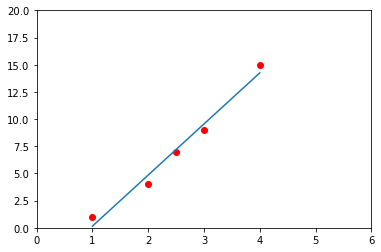

In [2]:
plt.plot(x, y, 'ro')
plt.axis([0, 6, 0, 20])
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))
plt.show()

Once we've generated this line for our dataset, we can use its equation to predict future values. We just pass the features of the data point we would like to predict into the equation of the line and use the output as our prediction.

## Imports

In above cell:
np.unique(x) = Find the unique elements of an array.

np.polyfit(x, y, 1) = Returns a vector of coefficients p that minimises the squared error, here 1 is degree of the fitted ploynomial.

np.poly1d() = A convenience class, used to encapsulate “natural” operations on polynomials so that said operations may take on their customary form in code (see Examples).
Construct the polynomial x^2 + 2x + 3:

p = np.poly1d([1, 2, 3])
print(np.poly1d(p))
=>   2
1 x + 2 x + 3
Evaluate the polynomial at x = 0.5:

p(0.5)
=> 4.25
and np.unique(x) in the argument of np.poly1d() work as a variable.

In [3]:
from __future__ import absolute_import, division, print_function, unicode_literals
# With __future__ module's inclusion, you can slowly be accustomed to incompatible changes or 
# to such ones introducing new keywords.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import clear_output
from six.moves import urllib
# six is a package that helps in writing code that is compatible with both Python 2 and Python 3.

import tensorflow.compat.v2.feature_column as fc

import tensorflow as tf

## Data

The dataset we will be focusing on here is the titanic dataset. It has tons of information about each passanger on the ship. Our first step is always to understand the data and explore it.

*Below we will load a dataset and learn how we can explore it using some built-in tools.*

In [4]:
# Load dataset.
dftrain = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/train.csv') # training data
dfeval = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/eval.csv') # testing data
y_train = dftrain.pop('survived') # removing the survived column from training data & storing it in another variable
y_eval = dfeval.pop('survived') # removing the survived column from testing data & storing it in another variable

The ```pd.read_csv()``` method will return to us a new pandas *dataframe*. You can think of a dataframe like a table.

We've decided to pop the "survived" column from our dataset and store it in a new variable. This column simply tells us if the person survived our not.

To look at the data we'll use the ```.head()``` method from pandas. This will show us the first 5 items in our dataframe.

In [5]:
dftrain.head()

,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,male,22.0,1,0,7.2500,Third,unknown,Southampton,n
1,female,38.0,1,0,71.2833,First,C,Cherbourg,n
2,female,26.0,0,0,7.9250,Third,unknown,Southampton,y
3,female,35.0,1,0,53.1000,First,C,Southampton,n
4,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y


In [6]:
dftrain.describe()

,age,n_siblings_spouses,parch,fare
count,627.000000,627.000000,627.000000,627.000000
mean,29.631308,0.545455,0.379585,34.385399
std,12.511818,1.151090,0.792999,54.597730
min,0.750000,0.000000,0.000000,0.000000
25%,23.000000,0.000000,0.000000,7.895800
50%,28.000000,0.000000,0.000000,15.045800
75%,35.000000,1.000000,0.000000,31.387500
max,80.000000,8.000000,5.000000,512.329200


In [7]:
dftrain.shape

(627, 9)

So have have 627 entries and 9 features, nice!

In [8]:
# Let's have a look at our survival information.
y_train.head()

0    0
1    1
2    1
3    1
4    0
Name: survived, dtype: int64

## Visualization

.hist > **Draw histogram of the input series using matplotlib.**

bins > A histogram displays numerical data by grouping data into "bins" of equal width. Each bin is plotted as a bar whose height corresponds to how many data points are in that bin.
Bins are also sometimes called "intervals", "classes", or "buckets".

<AxesSubplot:>

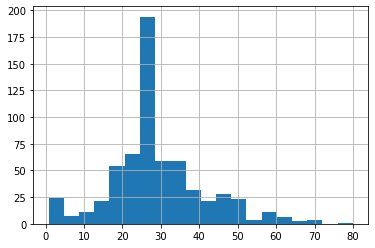

In [9]:
dftrain.age.hist(bins=20)

<AxesSubplot:>

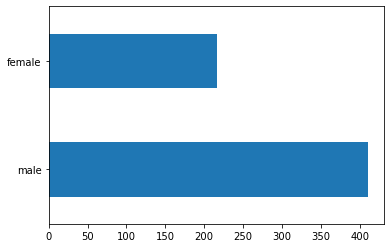

In [10]:
# 'barh' making horizontal histograms
dftrain.sex.value_counts().plot(kind='barh')

<AxesSubplot:>

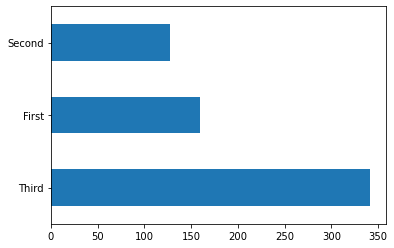

In [11]:
dftrain['class'].value_counts().plot(kind='barh')

Text(0.5, 0, '% survive')

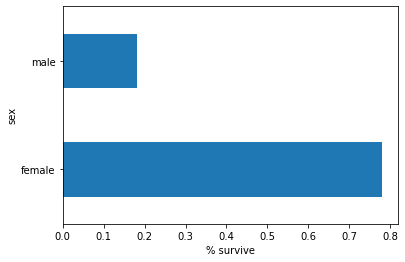

In [12]:
pd.concat([dftrain, y_train], axis=1).groupby('sex')['survived'].mean().plot(kind='barh').set_xlabel('% survive')

**UNDERSTAND THE ABOVE COMMANDS OF VISUALISATION**

After analyzing this information, we should notice the following:
- Most passengers are in their 20's or 30's 
- Most passengers are male
- Most passengers are in "Third" class
- Females have a much higher chance of survival

## Feature Columns

Estimators use a system called **feature columns** to describe how the model should interpret each of the raw input features. **An Estimator expects a vector of numeric inputs, and feature columns describe how the model should convert each feature.**

Selecting and crafting the right set of feature columns is key to learning an effective model. **A feature column can be either one of the raw inputs in the original features dict (a base feature column), or any new columns created using transformations defined over one or multiple base columns (a derived feature columns).**

The linear estimator uses both numeric and categorical features. Feature columns work with all TensorFlow estimators and their purpose is to define the features used for modeling. Additionally, they provide some feature engineering capabilities like one-hot-encoding, normalization, and bucketization.

In our dataset we have two different kinds of information: **Categorical and Numeric**

Our **categorical data** is anything that is not numeric! For example, the sex column does not use numbers, it uses the words "male" and "female".

Before we continue and create/train a model we must convert our categorical data into numeric data. We can do this by encoding each category with an integer (ex. male = 1, female = 2). 

In [13]:
CATEGORICAL_COLUMNS = ['sex', 'n_siblings_spouses', 'parch', 'class', 'deck',
                       'embark_town', 'alone']
NUMERIC_COLUMNS = ['age', 'fare']

feature_columns = []
for feature_name in CATEGORICAL_COLUMNS:
  vocabulary = dftrain[feature_name].unique()  # gets a list of all unique values from given feature column
  feature_columns.append(tf.feature_column.categorical_column_with_vocabulary_list(feature_name, vocabulary))

for feature_name in NUMERIC_COLUMNS:
  feature_columns.append(tf.feature_column.numeric_column(feature_name, dtype=tf.float32))

print(feature_columns)

[VocabularyListCategoricalColumn(key='sex', vocabulary_list=('male', 'female'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='n_siblings_spouses', vocabulary_list=(1, 0, 3, 4, 2, 5, 8), dtype=tf.int64, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='parch', vocabulary_list=(0, 1, 2, 5, 3, 4), dtype=tf.int64, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='class', vocabulary_list=('Third', 'First', 'Second'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='deck', vocabulary_list=('unknown', 'C', 'G', 'A', 'B', 'D', 'F', 'E'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='embark_town', vocabulary_list=('Southampton', 'Cherbourg', 'Queenstown', 'unknown'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='alone', vocabulary_list=('n', 'y'), dtype=tf.string, def

Essentially what we are doing here is creating a list of features that are used in our dataset. 

The cryptic lines of code inside the ```append()``` create an object that our model can use to map string values like "male" and "female" to integers. This allows us to avoid manually having to encode our dataframes.

*And here is some relevant documentation*

https://www.tensorflow.org/api_docs/python/tf/feature_column/categorical_column_with_vocabulary_list?version=stable

## The Training Process
**How input data is fed to our model.** 

For this specific model data is going to be streamed into it in small batches of 32. This means we will not feed the entire dataset to our model at once, but simply small batches of entries. We will feed these batches to our model multiple times according to the number of **epochs**. 

An **epoch** is simply one stream of our entire dataset. The number of epochs we define is the amount of times our model will see the entire dataset. We use multiple epochs in hope that after seeing the same data multiple times the model will better determine how to estimate it.

Ex. if we have 10 ephocs, our model will see the same dataset 10 times. 

Since we need to feed our data in batches and multiple times, we need to create something called an **input function**. The input function simply defines how our dataset will be converted into batches at each epoch.


## Input Function
The TensorFlow model we are going to use requires that the data we pass it comes in as a ```tf.data.Dataset``` object. This means we must create a *input function* that can convert our current pandas dataframe into that object. 

The **input_function** specifies how data is converted to a tf.data.Dataset that feeds the input pipeline in a streaming fashion. tf.data.Dataset can take in multiple sources such as a dataframe, a csv-formatted file, and more.

**Documentation** - (https://www.tensorflow.org/tutorials/estimator/linear)

In [14]:
def make_input_fn(data_df, label_df, num_epochs=10, shuffle=True, batch_size=32):
  def input_function():  # inner function, this will be returned
    ds = tf.data.Dataset.from_tensor_slices((dict(data_df), label_df))  # create tf.data.Dataset object with data and its label
    if shuffle:
      ds = ds.shuffle(1000)  # randomize order of data same as scikit learn we can give any value.
    ds = ds.batch(batch_size).repeat(num_epochs)  # split dataset into batches of 32 and repeat process for number of epochs
    return ds  # return a batch of the dataset
  return input_function  # return a function object for use

# here we will call the input_function that was returned to us to get a dataset object we can feed to the model
train_input_fn = make_input_fn(dftrain, y_train)  
eval_input_fn = make_input_fn(dfeval, y_eval, num_epochs=1, shuffle=False)

**WHY DID WE MAKE 2 FUNCTIONS INSTEAD OF ONE, COULDN'T WE HAVE JUST MADE ONE FUNCTION PASSING PARAMETER STRAIGHT INTO IT?**

**ANSWER -** Because the argument inside the <code>.train()</code> & <code>.evaluate()</code> methods accepts only functions as input & hence we created <code>another function</code> and then put the <code>input function</code> inside that. 

Main purpose of doing this is because while training or evaluating a model uses <code>function</code> provided by the **input function argument** to provide input data for training as minibatches. Which means that when a batch of data comes through the input function is called & the data is passed into it. 

Another workaround is using a <code>lambda function</code> instead of embedding <code>input</code> inside of <code>another function</code>.

## CREATING THE MODEL

In [15]:
linear_est = tf.estimator.LinearClassifier(feature_columns=feature_columns)
# We create a linear estimtor by passing the feature columns we created earlier
# This is logistic Regression

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\SHLOKR~1\\AppData\\Local\\Temp\\tmpwloiikx6', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


## TRAINING THE MODEL

In [16]:
linear_est.train(train_input_fn)  # train
result = linear_est.evaluate(eval_input_fn)  # get model metrics/stats by testing on tetsing data

clear_output()  # clears consoke output
print(result['accuracy'])
# the result variable is simply a dict of stats about our model
print(result)

0.7613636
{'accuracy': 0.7613636, 'accuracy_baseline': 0.625, 'auc': 0.8260484, 'auc_precision_recall': 0.7792447, 'average_loss': 0.50978214, 'label/mean': 0.375, 'loss': 0.50173974, 'precision': 0.725, 'prediction/mean': 0.29768586, 'recall': 0.5858586, 'global_step': 200}


Now let's see how we can actually use this model to make predicitons.

We can use the ```.predict()``` method to get survival probabilities from the model. This method will return a list of dicts that store a predicition for each of the entries in our testing data set.

In [17]:
# We have dictionary that represents the all the prediction of 264 rows
result = list(linear_est.predict(eval_input_fn))
print(result)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\SHLOKR~1\AppData\Local\Temp\tmpwloiikx6\model.ckpt-200
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
[{'logits': array([-2.793256], dtype=float32), 'logistic': array([0.05768967], dtype=float32), 'probabilities': array([0.9423103 , 0.05768969], dtype=float32), 'class_ids': array([0], dtype=int64), 'classes': array([b'0'], dtype=object), 'all_class_ids': array([0, 1]), 'all_classes': array([b'0', b'1'], dtype=object)}, {'logits': array([-1.6387725], dtype=float32), 'logistic': array([0.16263217], dtype=float32), 'probabilities': array([0.83736783, 0.16263217], dtype=float32), 'class_ids': array([0], dtype=int64), 'classes': array([b'0'], dtype=object), 'all_class_ids': array([0, 1]), 'all_classes': array([b'0', b'1'], dtype=object)}, {'logits': array([0.12139925], dtype=float32), 'logistic': 

In [18]:
# This is the prediction of the first row since we type casting our result(in a format of dictionary) in list.
print(result[0])

{'logits': array([-2.793256], dtype=float32), 'logistic': array([0.05768967], dtype=float32), 'probabilities': array([0.9423103 , 0.05768969], dtype=float32), 'class_ids': array([0], dtype=int64), 'classes': array([b'0'], dtype=object), 'all_class_ids': array([0, 1]), 'all_classes': array([b'0', b'1'], dtype=object)}


In [19]:
# We only want the probabilities of survived or not survived
print(result[0]['probabilities'])
# The first one probability indicate 0 means don't survive.
# The second one probability indicates 1 means survive.

[0.9423103  0.05768969]


In [20]:
# Getting only survived ones.
print(result[0]['probabilities'][1])

0.057689693


In [21]:
print(dfeval.iloc[0])
print(result[0]['probabilities'][1])
print("The actual data about the person is survive or not is = ",end="")
print(y_eval.iloc[0])

sex                          male
age                            35
n_siblings_spouses              0
parch                           0
fare                         8.05
class                       Third
deck                      unknown
embark_town           Southampton
alone                           y
Name: 0, dtype: object
0.057689693
The actual data about the person is survive or not is = 0


Here we saw that the person which is 'male' of age '35', having '0' sibling or spouse and parch and pay fair of amount '8.05' of class 'third', 'unknown' deck town 'Southampton', who is alone having probabilty of approximately '6.8' percent.

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\SHLOKR~1\AppData\Local\Temp\tmpwloiikx6\model.ckpt-200
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


<AxesSubplot:title={'center':'predicted probabilities'}, ylabel='Frequency'>

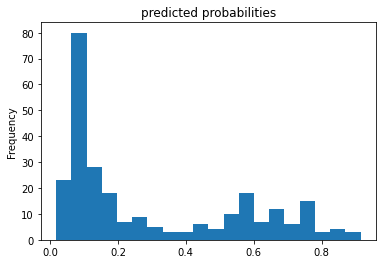

In [22]:
# this is inbuit it take automatically frequency on y axis.
pred_dicts = list(linear_est.predict(eval_input_fn))
probs = pd.Series([x['probabilities'][1] for x in pred_dicts])

probs.plot(kind='hist', bins=20, title='predicted probabilities')

In [23]:
print(probs)

0      0.057690
1      0.162632
2      0.530313
3      0.494343
4      0.195612
         ...   
259    0.697049
260    0.061215
261    0.388117
262    0.138632
263    0.253777
Length: 264, dtype: float64


<AxesSubplot:title={'center':'predicted probabilities'}, ylabel='Frequency'>

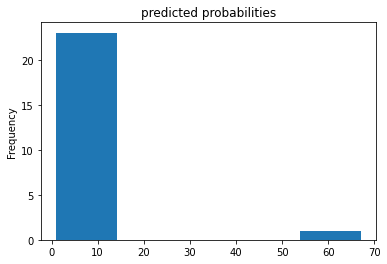

In [24]:
# To check the inbuilt function of plotting frequency on y axis.
x = pd.Series([1,2,3,1,1,2,5,67,8,9,4,3,2,2,3,3,4,4,6,7,5,1,2,5])
x.plot(kind='hist', bins=5, title='predicted probabilities')

## Derived Feature Columns

Now you reached an accuracy of 75%. Using each base feature column separately may not be enough to explain the data. For example, the correlation between age and the label may be different for different gender. Therefore, if you only learn a single model weight for <code>gender="Male"</code> and <code>gender="Female"</code>, you won't capture every age-gender combination (e.g. distinguishing between <code>gender="Male"</code> AND <code>age="30"</code> AND <code>gender="Male"</code> AND <code>age="40"</code>).

To learn the differences between different feature combinations, you can add crossed feature columns to the model (you can also bucketize age column before the cross column):

In [25]:
age_x_gender = tf.feature_column.crossed_column(['age', 'sex'], hash_bucket_size=100)

After adding the combination feature to the model, let's train the model again:

In [27]:
derived_feature_columns = [age_x_gender]
linear_est = tf.estimator.LinearClassifier(feature_columns=feature_columns+derived_feature_columns)
linear_est.train(train_input_fn)
result = linear_est.evaluate(eval_input_fn)

clear_output()
print(result)

{'accuracy': 0.77272725, 'accuracy_baseline': 0.625, 'auc': 0.84940314, 'auc_precision_recall': 0.78258806, 'average_loss': 0.46376845, 'label/mean': 0.375, 'loss': 0.45515236, 'precision': 0.7096774, 'prediction/mean': 0.37361747, 'recall': 0.6666667, 'global_step': 200}


It now achieves an accuracy of 77.2%, which is slightly better than only trained in base features. You can try using more features and transformations to see if you can do better!

Now you can use the train model to make predictions on a passenger from the evaluation set. TensorFlow models are optimized to make predictions on a batch, or collection, of examples at once. Earlier, the eval_input_fn was defined using the entire evaluation set.

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\SHLOKR~1\AppData\Local\Temp\tmpqy6po4cd\model.ckpt-200
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


<AxesSubplot:title={'center':'predicted probabilities'}, ylabel='Frequency'>

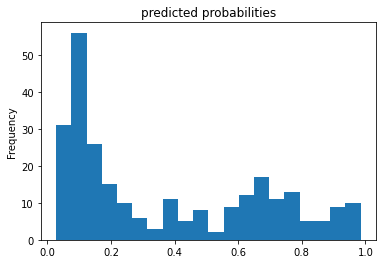

In [28]:
pred_dicts = list(linear_est.predict(eval_input_fn))
probs = pd.Series([pred['probabilities'][1] for pred in pred_dicts])

probs.plot(kind='hist', bins=20, title='predicted probabilities')

Finally, look at the receiver operating characteristic (ROC) of the results, which will give us a better idea of the tradeoff between the true positive rate and false positive rate.



(0.0, 1.05)

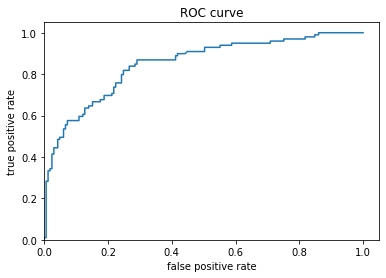

In [29]:
from sklearn.metrics import roc_curve
from matplotlib import pyplot as plt

fpr, tpr, _ = roc_curve(y_eval, probs)
plt.plot(fpr, tpr)
plt.title('ROC curve')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.xlim(0,)
plt.ylim(0,)